Problem 10:

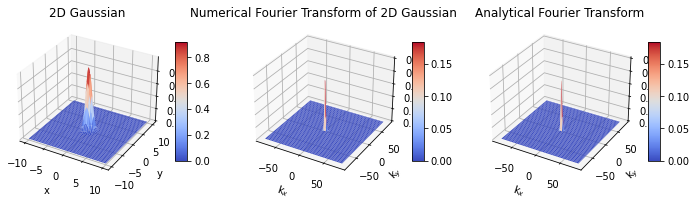

In [7]:
import numpy as np
import numpy.fft as ft
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def Gaussian(x, y):
    return np.exp(-(x**2.0 + y**2.0))

def FT_Gaussian(kx, ky):
    return 0.5 * np.exp(-(kx**2.0 + ky**2.0) * 0.25)

x_min = -10.0
x_max = 10.0
y_min = -10.0
y_max = 10.0
nx = 512
ny = 512

dx = (x_max - x_min) / (nx - 1)
dy = (y_max - y_min) / (ny - 1)

X, Y = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

f = Gaussian(X, Y)

kx = 2.0 * np.pi * ft.fftshift(ft.fftfreq(nx, d=dx))
ky = 2.0 * np.pi * ft.fftshift(ft.fftfreq(ny, d=dy))
K_x, K_y = np.meshgrid(kx, ky)
dft_f = ft.fftshift(ft.fft2(f, norm='ortho'))
ft_f = (np.sqrt(nx * ny) / (2 * np.pi)) * dx * dy * np.exp(-1.0j * x_min * K_x) * np.exp(-1.0j * y_min * K_y) * dft_f

fig = plt.figure(figsize=(12, 8))

plt_3d_f = fig.add_subplot(231, projection='3d')
plt_3d_f.set_title("2D Gaussian")
surf = plt_3d_f.plot_surface(X, Y, f, cmap=cm.coolwarm)
plt.colorbar(surf, shrink=0.6, aspect=10)
plt_3d_f.set_xlabel("x")
plt_3d_f.set_ylabel("y")
# plt_3d_f.set_zlabel("exp($x^2+y^2$)")

plt_3d_ft = fig.add_subplot(232, projection='3d')
plt_3d_ft.set_title("Numerical Fourier Transform of 2D Gaussian")
surf_ft = plt_3d_ft.plot_surface(K_x, K_y, ft_f.real, cmap=cm.coolwarm)
plt.colorbar(surf_ft, shrink=0.6, aspect=10)
plt_3d_ft.set_xlabel("k$_x$")
plt_3d_ft.set_ylabel("k$_y$")


plt_3d_ft2 = fig.add_subplot(233, projection='3d')
plt_3d_ft2.set_title("Analytical Fourier Transform")
surf_ft2 = plt_3d_ft2.plot_surface(K_x, K_y, FT_Gaussian(K_x, K_y), cmap=cm.coolwarm)
plt.colorbar(surf_ft2, shrink=0.6, aspect=10)
plt_3d_ft2.set_xlabel("k$_x$")
plt_3d_ft2.set_ylabel("k$_y$")


plt.show()
